In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
df = pd.read_csv("Mortality_rates.csv")
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.693958,3.704366,3.702853,3.707389,3.704081,3.708613,3.714271,3.712947,3.711340,3.710868
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.893564,2.863555,2.859333,2.851061,2.843352,2.837727,2.840657,2.835373,2.810372,2.785535
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.369048,3.367010,3.363282,3.360569,3.356375,3.356570,3.360069,3.368911,3.368156,3.373387
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.023388,3.023388,2.886710,2.886710,2.886710,2.695829,2.695829,2.585366,2.585366,2.511848
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.644281,3.620112,3.638344,3.660103,3.688003,3.668960,3.649337,3.680611,3.617521,3.626943


In [245]:
df_2 = pd.read_csv("Rec_rates.csv")
df_2.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83.305658,83.275466,83.241464,83.269545,83.213093,83.200367,83.420798,83.500560,83.599338,83.588699
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.830140,56.025075,56.029130,56.238121,55.788521,56.971100,57.197810,57.491391,58.503549,59.735052
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.293651,70.274224,70.248650,70.228228,70.221474,70.220452,70.205186,70.199884,70.191526,70.177638
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.625214,68.625214,68.790850,68.790850,68.790850,64.343845,64.343845,69.853659,69.853659,72.985782
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.761174,33.586592,33.856209,35.081336,36.180585,37.794455,37.370031,39.038616,40.711772,42.506237


In [140]:
dates = list(df.columns[1:])
for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%m/%d/%y')

## Overall trend of mortality and recovery rates

In [149]:
mortality_rates = df.drop("Country/Region", axis = 1)
countries_to_count = (mortality_rates > 0).sum(axis = 0)
sum_of_mr = mortality_rates.sum(axis = 0)
trend_mortality_rates = sum_of_mr / countries_to_count
print(trend_mortality_rates.shape)
trend_mortality_rates[-5:]

(255,)


9/28/20    2.866731
9/29/20    2.860896
9/30/20    2.851330
10/1/20    2.842300
10/2/20    2.831957
dtype: float64

In [246]:
recovery_rates = df_2.drop("Country/Region", axis = 1)
countries_to_count = (recovery_rates > 0).sum(axis = 0)
sum_of_rr = recovery_rates.sum(axis = 0)
trend_recovery_rates = sum_of_rr / countries_to_count
print(trend_recovery_rates.shape)
trend_recovery_rates[-5:]

(255,)


9/28/20    75.538966
9/29/20    75.646627
9/30/20    75.769140
10/1/20    75.895877
10/2/20    75.873427
dtype: float64

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699.]),
 <a list of 9 Text xticklabel objects>)

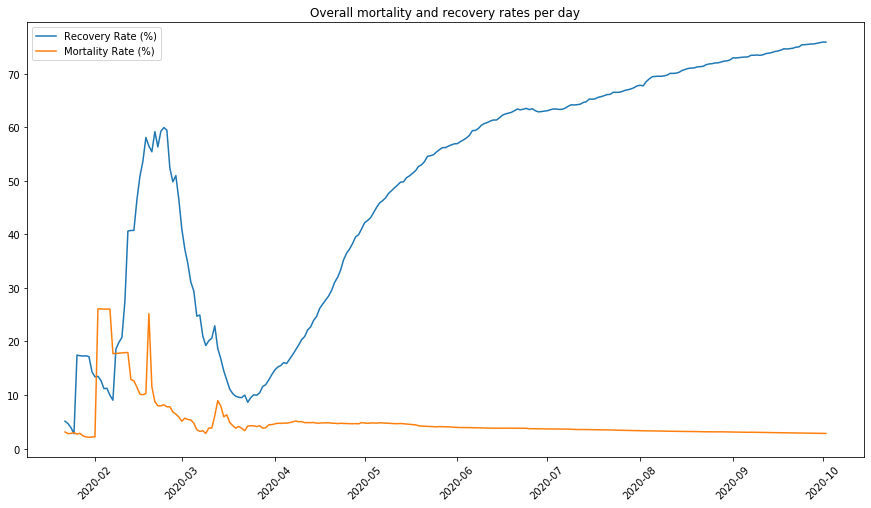

In [249]:
plt.figure(figsize = (15, 8))
sns.lineplot(dates, trend_recovery_rates, label = "Recovery Rate (%)")
sns.lineplot(dates, trend_mortality_rates, label = "Mortality Rate (%)")
plt.title("Overall mortality and recovery rates per day")
plt.xticks(rotation = 45)

## Countries with the lowest mortality rate

In [196]:
df_compare = df.set_index("Country/Region")["10/2/20"]
df_compare = df_compare[df_compare > 0]
df_compare = df_compare.sort_values()
countries_higher_mr = df_compare[-13:].rename("Date")
countries_lower_mr = df_compare[:13].rename("Date")
countries_lower_mr

Country/Region
Singapore               0.046718
Qatar                   0.170413
Burundi                 0.194932
Maldives                0.326986
Bahrain                 0.355138
Iceland                 0.355999
Sri Lanka               0.383707
United Arab Emirates    0.439246
Slovakia                0.464836
Botswana                0.504414
Jordan                  0.578755
Kuwait                  0.579713
Rwanda                  0.598308
Name: Date, dtype: float64

In [250]:
countries = list(countries_lower_mr.index)
holder = df.set_index("Country/Region").T[countries]
to_plot_lower_mr = holder[countries].reset_index()
to_plot_lower_mr = to_plot_lower_mr.rename({"index": "Date"}, axis = 1).set_index("Date")

(array([  3.,  11.,  19.,  27.,  35.,  43.,  51.,  59.,  67.,  75.,  83.,
         91.,  99., 107., 115., 123., 131., 139., 147., 155., 163., 171.,
        179., 187., 195., 203., 211., 219., 227., 235., 243., 251.]),
 <a list of 32 Text xticklabel objects>)

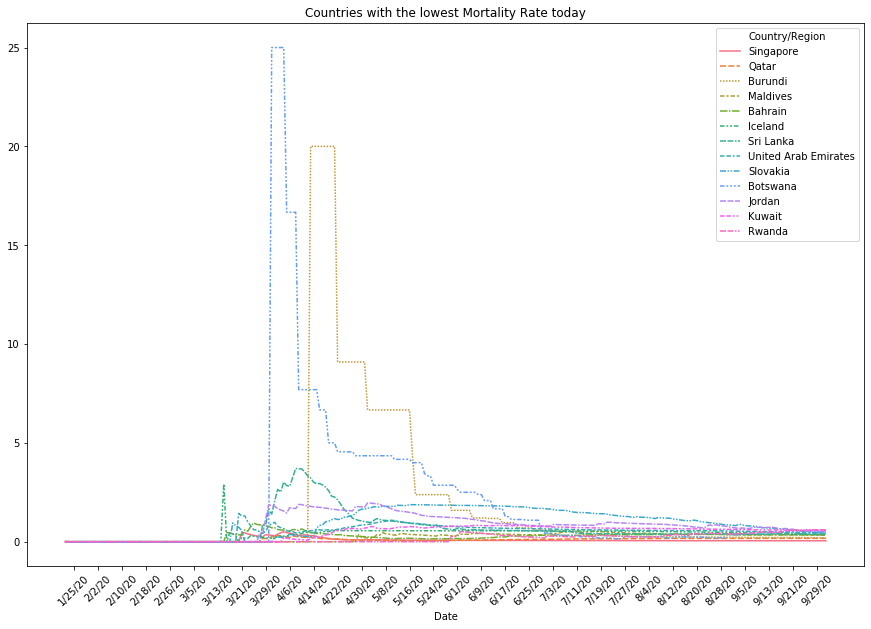

In [251]:
plt.figure(figsize = (15, 10))
fig = sns.lineplot(data = to_plot_lower_mr)
fig.set(xticks=to_plot_lower_mr.index[3::8])
plt.title("Countries with the lowest Mortality Rate today")
plt.xticks(rotation = 45)

## Countries with the higher Mortality Rates

In [240]:
countries = list(countries_higher_mr.index)
holder = df.set_index("Country/Region").T[countries]
to_plot_higher_mr = holder[countries].reset_index()
to_plot_higher_mr = to_plot_higher_mr.rename({"index": "Date"}, axis = 1).set_index("Date")

(array([  3.,  11.,  19.,  27.,  35.,  43.,  51.,  59.,  67.,  75.,  83.,
         91.,  99., 107., 115., 123., 131., 139., 147., 155., 163., 171.,
        179., 187., 195., 203., 211., 219., 227., 235., 243., 251.]),
 <a list of 32 Text xticklabel objects>)

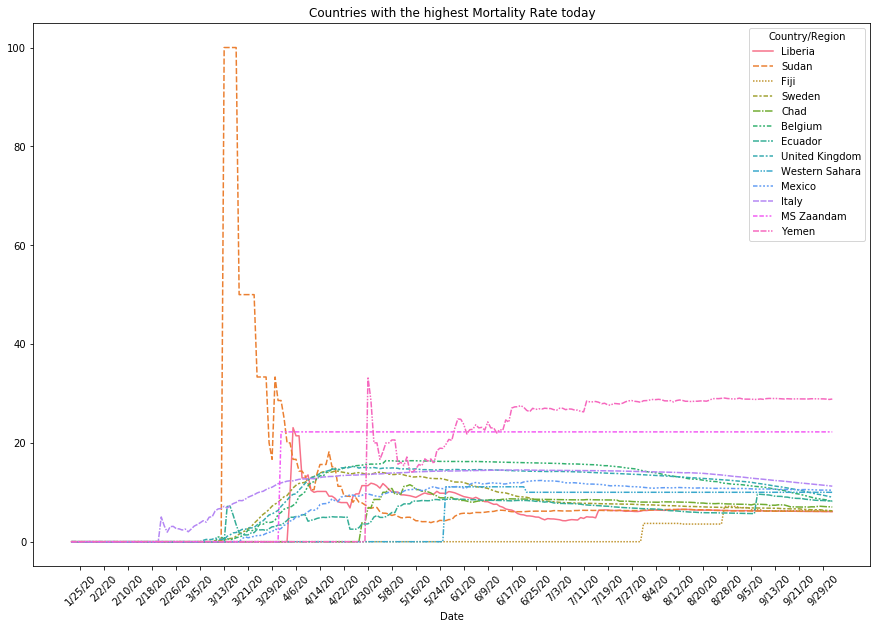

In [243]:
plt.figure(figsize = (15, 10))
fig = sns.lineplot(data = to_plot_higher_mr)
fig.set(xticks=to_plot_higher_mr.index[3::8])
plt.title("Countries with the highest Mortality Rate today")
plt.xticks(rotation = 45)

In [134]:
len(dates)

255